## Various CNN Networks On MNIST Data Set :

In [2]:
from __future__ import print_function
from datetime import datetime
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.initializers import he_normal
from keras.layers.normalization import BatchNormalization
batch_size = 128
num_classes = 10
epochs = 12
# input image dimensions
img_rows, img_cols = 28, 28

Using TensorFlow backend.


In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (60000, 28, 28, 1)
60000 train samples
10000 test samples


In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import time
# https://gist.github.com/greydanus/f6eee59eaf1d90fcb3b534a25362cea4
# https://stackoverflow.com/a/14434334
# this function is used to update the plots for each epoch and error
def plt_dynamic(x, vy, ty):
  fig = plt.figure( facecolor='y', edgecolor='k')
  plt.plot(x, vy, 'b', label="Validation Loss")
  plt.plot(x, ty, 'r', label="Train Loss")
  plt.xlabel('Epochs') 
  plt.ylabel('Categorical Crossentropy Loss')
  plt.legend()
  plt.grid()
  plt.show()

## 1st Model With 3 ConvNet & 3*3 Kernel Size :

In [7]:
convnet=Sequential() # Initializing the model
convnet.add(Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=input_shape))
convnet.add(Conv2D(64,kernel_size=(3,3),activation='relu'))
convnet.add(Dropout(0.25))
convnet.add(Conv2D(128,kernel_size=(3,3),activation='relu'))
#maxpooling by (2,2 ) ,dropout,flattening
convnet.add(MaxPooling2D(pool_size=(2,2)))
convnet.add(Dropout(0.25))
convnet.add(Flatten())
#hidden_layer
convnet.add(Dense(256,activation='relu',kernel_initializer=he_normal(seed=None)))
convnet.add(Dropout(0.5))
convnet.add(Dense(num_classes,activation='softmax'))
print(convnet.summary())

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
dropout_1 (Dropout)          (None, 24, 24, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 22, 22, 128)       73856     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 11, 11, 128)       0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 11, 11, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 15488)            

In [8]:
convnet.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
convnet_history=convnet.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 231s 4ms/step - loss: 0.1775 - accuracy: 0.9453 - val_loss: 0.0435 - val_accuracy: 0.9857
Epoch 2/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0601 - accuracy: 0.9823 - val_loss: 0.0385 - val_accuracy: 0.9874
Epoch 3/12
60000/60000 [==============================] - 226s 4ms/step - loss: 0.0467 - accuracy: 0.9857 - val_loss: 0.0335 - val_accuracy: 0.9892
Epoch 4/12
60000/60000 [==============================] - 228s 4ms/step - loss: 0.0365 - accuracy: 0.9886 - val_loss: 0.0235 - val_accuracy: 0.9918
Epoch 5/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0288 - accuracy: 0.9912 - val_loss: 0.0224 - val_accuracy: 0.9924
Epoch 6/12
60000/60000 [==============================] - 237s 4ms/step - loss: 0.0241 - accuracy: 0.9923 - val_loss: 0.0224 - val_accuracy: 0.9929
Epoch 7/12
60000/60000 [==============================] - 231s

test score : 0.028591023394818865
test sccuracy : 0.9926000237464905


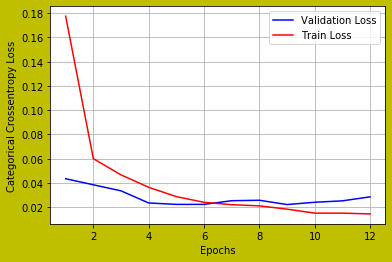

In [10]:
score=convnet.evaluate(x_test,y_test,verbose=0)
test_score=score[0]
test_accuracy=score[1]
train_accuracy=max(convnet_history.history['accuracy'])
print('test score :',test_score)
print('test sccuracy :',test_accuracy)
# error plot
x=list(range(1,epochs+1))
vy=convnet_history.history['val_loss'] #validation loss
ty=convnet_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

## 2nd Model CNN with 5 ConvNet & 5*5 Kernel Size :

In [11]:
convnet2=Sequential() # Initializing the model
# First ConvNet
convnet2.add(Conv2D(32,kernel_size=(5,5),activation='relu',padding='same',input_shape=input_shape))
convnet2.add(Conv2D(64,kernel_size=(5,5),padding='same',activation='relu'))#Second Convnet
convnet2.add(MaxPooling2D(pool_size=(2,2)))
convnet2.add(Dropout(0.25))
convnet2.add(Conv2D(96,kernel_size=(5,5),padding='same',activation='relu'))  # 3rd ConvNet
#maxpooling by (2,2 ) ,dropout,flattening
convnet2.add(MaxPooling2D(pool_size=(2,2)))
convnet2.add(Dropout(0.25))
convnet2.add(Conv2D(128,kernel_size=(5,5),padding='same',activation='relu'))#fourth Convnet
convnet2.add(MaxPooling2D(pool_size=(2,2)))
convnet2.add(Dropout(0.25))
convnet2.add(Conv2D(164,kernel_size=(5,5),padding='same',activation='relu'))#fifth Convnet
convnet2.add(MaxPooling2D(pool_size=(2,2)))
convnet2.add(Dropout(0.25))
convnet2.add(Flatten())
#hidden_layer
convnet2.add(Dense(256,activation='relu',kernel_initializer=he_normal(seed=None)))
convnet2.add(BatchNormalization())
convnet2.add(Dropout(0.5))
convnet2.add(Dense(num_classes,activation='softmax'))
print(convnet2.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_4 (Conv2D)            (None, 28, 28, 32)        832       
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 28, 28, 64)        51264     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 14, 14, 64)        0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 14, 14, 96)        153696    
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 7, 7, 96)         

In [12]:
convnet2.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
convnet2_history=convnet2.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 294s 5ms/step - loss: 0.2618 - accuracy: 0.9147 - val_loss: 0.0633 - val_accuracy: 0.9804
Epoch 2/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0630 - accuracy: 0.9814 - val_loss: 0.0236 - val_accuracy: 0.9920
Epoch 3/12
60000/60000 [==============================] - 288s 5ms/step - loss: 0.0497 - accuracy: 0.9856 - val_loss: 0.0186 - val_accuracy: 0.9933
Epoch 4/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0381 - accuracy: 0.9888 - val_loss: 0.0280 - val_accuracy: 0.9924
Epoch 5/12
60000/60000 [==============================] - 289s 5ms/step - loss: 0.0342 - accuracy: 0.9896 - val_loss: 0.0222 - val_accuracy: 0.9934
Epoch 6/12
60000/60000 [==============================] - 290s 5ms/step - loss: 0.0303 - accuracy: 0.9914 - val_loss: 0.0280 - val_accuracy: 0.9925
Epoch 7/12
60000/60000 [==============================] - 289s

test score : 0.020858116581862943
test Accuracy : 0.9944999814033508


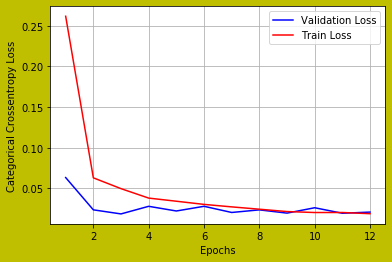

In [13]:
#evaluating model
score=convnet2.evaluate(x_test,y_test,verbose=0)
test_score2=score[0]
test_accuracy2=score[1]
train_accuracy2=max(convnet2_history.history['accuracy'])
print('test score :',test_score2)
print('test Accuracy :',test_accuracy2)
# error plot
x=list(range(1,epochs+1))
vy=convnet2_history.history['val_loss'] #validation loss
ty=convnet2_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

## 3rd Model CNN with 7 ConvNet & 2*2 kernel size :

In [15]:
convnet3=Sequential() # Initializing the model
# First ConvNet
convnet3.add(Conv2D(16,kernel_size=(2,2),activation='relu',padding='same',strides=(1,1),input_shape=input_shape))
convnet3.add(Conv2D(32,kernel_size=(2,2),padding='same',strides=(2,2),activation='relu'))#Second Convnet
convnet3.add(Conv2D(64,kernel_size=(2,2),padding='same',activation='relu'))  # 3rd ConvNet
convnet3.add(Dropout(0.15))
convnet3.add(Conv2D(96,kernel_size=(2,2),padding='same',activation='relu'))#fourth Convnet
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.39))
convnet3.add(Conv2D(128,kernel_size=(2,2),padding='same',activation='relu'))#fifth Convnet
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.3))
convnet3.add(Conv2D(164,kernel_size=(2,2),padding='same',activation='relu'))#sixth Convnet
convnet3.add(Conv2D(164,kernel_size=(2,2),padding='same',strides=(1,1),activation='relu'))#seventh Convnet
convnet3.add(MaxPooling2D(pool_size=(2,2)))
convnet3.add(Dropout(0.4))
convnet3.add(Flatten())
#hidden_layer
convnet3.add(Dense(256,activation='relu',kernel_initializer=he_normal(seed=None)))#1 hidden layer
convnet3.add(BatchNormalization())
convnet3.add(Dropout(0.4))
convnet3.add(Dense(148,activation='relu',kernel_initializer=he_normal(seed=None)))#2 hidden layer
convnet3.add(BatchNormalization())
convnet3.add(Dropout(0.3))
convnet3.add(Dense(128,activation='relu',kernel_initializer=he_normal(seed=None)))#3 hidden layer
convnet3.add(BatchNormalization())
convnet3.add(Dropout(0.4))
convnet3.add(Dense(num_classes,activation='softmax'))
print(convnet3.summary())

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_16 (Conv2D)           (None, 28, 28, 16)        80        
_________________________________________________________________
conv2d_17 (Conv2D)           (None, 14, 14, 32)        2080      
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 64)        8256      
_________________________________________________________________
dropout_12 (Dropout)         (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 96)        24672     
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 7, 7, 96)          0         
_________________________________________________________________
dropout_13 (Dropout)         (None, 7, 7, 96)         

In [16]:
convnet3.compile(optimizer=keras.optimizers.Adam(),loss=keras.losses.categorical_crossentropy,metrics=['accuracy'])
convnet3_history=convnet3.fit(x_train,y_train,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/12
60000/60000 [==============================] - 121s 2ms/step - loss: 1.5887 - accuracy: 0.4850 - val_loss: 0.3675 - val_accuracy: 0.8998
Epoch 2/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.2623 - accuracy: 0.9277 - val_loss: 0.0670 - val_accuracy: 0.9809
Epoch 3/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1499 - accuracy: 0.9601 - val_loss: 0.0532 - val_accuracy: 0.9863
Epoch 4/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1145 - accuracy: 0.9696 - val_loss: 0.0424 - val_accuracy: 0.9885
Epoch 5/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.1007 - accuracy: 0.9742 - val_loss: 0.0431 - val_accuracy: 0.9892
Epoch 6/12
60000/60000 [==============================] - 118s 2ms/step - loss: 0.0878 - accuracy: 0.9768 - val_loss: 0.0310 - val_accuracy: 0.9908
Epoch 7/12
60000/60000 [==============================] - 118s

test score : 0.027557419139193372
test Accuracy : 0.9927999973297119


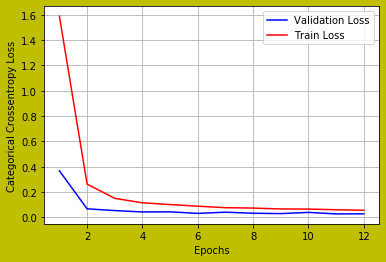

In [17]:
score=convnet3.evaluate(x_test,y_test,verbose=0)
test_score3=score[0]
test_accuracy3=score[1]
train_accuracy3=max(convnet3_history.history['accuracy'])
print('test score :',test_score3)
print('test Accuracy :',test_accuracy3)
# error plot
x=list(range(1,epochs+1))
vy=convnet3_history.history['val_loss'] #validation loss
ty=convnet3_history.history['loss'] # train loss
plt_dynamic(x, vy, ty)

## Conclusion :

In [18]:
from prettytable import PrettyTable
models=['3ConvNet with kernel 3x3',
        '5ConvNet with kernel 5x5',
        '7ConvNet with kernel 2x2']
training_accuracy=[train_accuracy,train_accuracy2,train_accuracy3]
test_accuracy=[test_accuracy,test_accuracy2,test_accuracy3]
INDEX = [1,2,3]
# Initializing prettytable
Model_Performance = PrettyTable()
# Adding columns
Model_Performance.add_column("INDEX.",INDEX)
Model_Performance.add_column("MODEL_NAME",models)
Model_Performance.add_column("TRAINING ACCURACY",training_accuracy)
Model_Performance.add_column("TESTING ACCURACY",test_accuracy)
#Model_Performance.add_column("TEST SCORE",test_score)

# Printing the Model_Performance
print(Model_Performance)

+--------+--------------------------+-------------------+--------------------+
| INDEX. |        MODEL_NAME        | TRAINING ACCURACY |  TESTING ACCURACY  |
+--------+--------------------------+-------------------+--------------------+
|   1    | 3ConvNet with kernel 3x3 |     0.9952833     | 0.9926000237464905 |
|   2    | 5ConvNet with kernel 5x5 |     0.99431664    | 0.9944999814033508 |
|   3    | 7ConvNet with kernel 2x2 |     0.9856667     | 0.9927999973297119 |
+--------+--------------------------+-------------------+--------------------+
